In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
df['species'] = iris.target
print('Dataset preview')
print(df.head())
print('Dataset shape:', df.shape)
#check for missing values
print('Missing values in each column:', df.isnull().sum())
#simulate missing data
df.loc[0, 'sepal length (cm)'] = np.nan
print('After adding NAN', df.head())
df.fillna(df.mean(), inplace = True) #Fill with Mean
print('After filling NAN', df.head())
X = df.drop('species', axis=1)
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
#Standardize the data

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print('Scaled X_train sample:', X_train[:5])


Dataset preview
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  
Dataset shape: (150, 5)
Missing values in each column: sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64
After adding NAN    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                NaN               3.5                1.4               0.2   
1                4.9               3.0                1.4               0

In [3]:
from sklearn.linear_model import LogisticRegression
#Logistic Regression
model_sk = LogisticRegression(max_iter=200)
model_sk.fit(X_train, y_train)
y_pred_sk = model_sk.predict(X_test)
print('Scikit learn predictions:', y_pred_sk[:5])

Scikit learn predictions: [1 0 2 1 1]


In [10]:
import tensorflow as tf

# Neural Network
model_tf = tf.keras.Sequential([tf.keras.layers.Dense(10, activation='relu', input_shape=(4,)),
                             tf.keras.layers.Dense(3, activation='softmax')])
model_tf.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_tf.fit(X_train, y_train, epochs=50, batch_size=16, verbose=1)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.3517 - loss: 1.3745
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3182 - loss: 1.3416  
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2668 - loss: 1.3447
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2896 - loss: 1.2629 
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3388 - loss: 1.1642 
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3064 - loss: 1.1398 
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2961 - loss: 1.1184
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3768 - loss: 1.0514 
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4088 - loss: 1.0410 
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5090 - loss: 0.9708
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6285 - loss: 0.9345 
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6738 - loss: 0.9014 


Accuracy of scikit-learn model: 1.0
Confusion Matrix of scikit-learn model:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


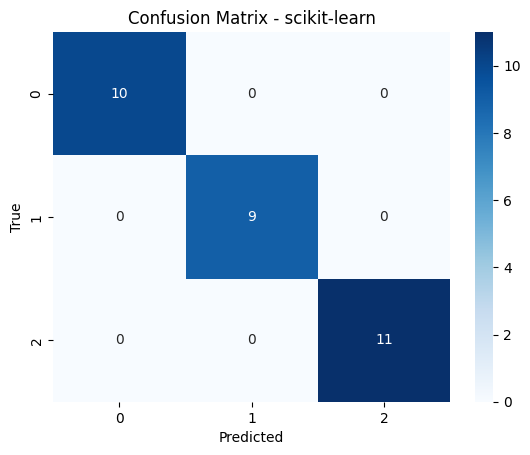

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

accuracy_sk = accuracy_score(y_test, y_pred_sk)
conf_matrix_sk = confusion_matrix(y_test, y_pred_sk)
print('Accuracy of scikit-learn model:', accuracy_sk)   
print('Confusion Matrix of scikit-learn model:\n', conf_matrix_sk)
print(conf_matrix_sk)

#visualize confusion matrix
sns.heatmap(conf_matrix_sk, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - scikit-learn')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [17]:
lost_tf , accuracy_tf = model_tf.evaluate(X_test, y_test)
print('Accuracy of TensorFlow model:', accuracy_tf)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step - accuracy: 0.9000 - loss: 0.3535
Accuracy of TensorFlow model: 0.8999999761581421
